In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/SREELAKSHMI/Downloads/Reviews.csv/Reviews.csv")

In [3]:
print(data.shape)

(568454, 10)


In [4]:
df = data.head(500)
print(df.shape)

(500, 10)


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


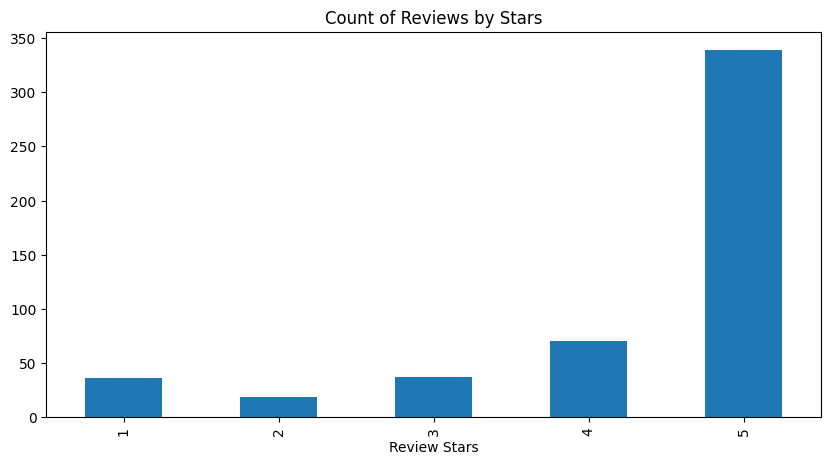

In [6]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
df.isnull().sum().sum()

0

In [8]:
example = df['Text'][6]
print(example)

This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wrapped well.  None of the candies were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this candy!  I served it at a beach-themed party and everyone loved it!


In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'saltwater',
 'taffy',
 'had',
 'great',
 'flavors',
 'and',
 'was',
 'very',
 'soft']

In [10]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SREELAKSHMI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('saltwater', 'NN'),
 ('taffy', 'NN'),
 ('had', 'VBD'),
 ('great', 'JJ'),
 ('flavors', 'NNS'),
 ('and', 'CC'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('soft', 'JJ')]

In [12]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\SREELAKSHMI\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [13]:
nltk.download('words')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\SREELAKSHMI\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  This/DT
  saltwater/NN
  taffy/NN
  had/VBD
  great/JJ
  flavors/NNS
  and/CC
  was/VBD
  very/RB
  soft/JJ
  and/CC
  chewy/JJ
  ./.
  Each/DT
  candy/NN
  was/VBD
  individually/RB
  wrapped/VBN
  well/RB
  ./.
  None/NN
  of/IN
  the/DT
  candies/NNS
  were/VBD
  stuck/VBN
  together/RB
  ,/,
  which/WDT
  did/VBD
  happen/VB
  in/IN
  the/DT
  expensive/JJ
  version/NN
  ,/,
  (PERSON Fralinger/NNP)
  's/POS
  ./.
  Would/MD
  highly/RB
  recommend/VB
  this/DT
  candy/NN
  !/.
  I/PRP
  served/VBD
  it/PRP
  at/IN
  a/DT
  beach-themed/JJ
  party/NN
  and/CC
  everyone/NN
  loved/VBD
  it/PRP
  !/.)


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SREELAKSHMI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
sia.polarity_scores("i love my parents")

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [19]:
sia.polarity_scores('This is the worst thing ever happened to me')

{'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.6249}

In [20]:
sia.polarity_scores(example)

{'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}

In [21]:
res={}
for i , row in tqdm(df.iterrows() , total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] =  sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df, how='left')

In [23]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<function matplotlib.pyplot.show(close=None, block=None)>

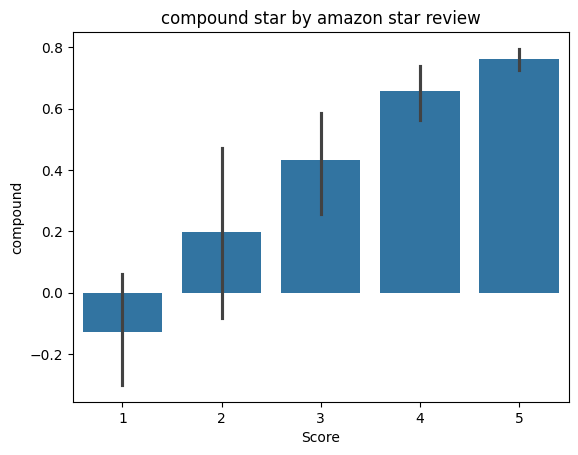

In [24]:
ax = sns.barplot(data = vaders, x= 'Score' ,y = 'compound')
ax.set_title("compound star by amazon star review")
plt.show

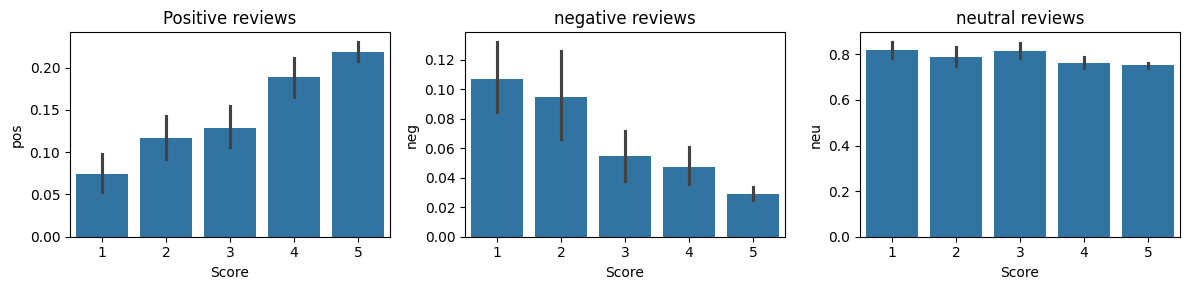

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data = vaders , x='Score' , y='pos',ax = axs[0] )
sns.barplot(data  = vaders , x = 'Score'  , y = 'neg' , ax= axs[1])
sns.barplot(data = vaders , x = 'Score' , y = 'neu' , ax = axs[2])
axs[0].set_title('Positive reviews')
axs[1].set_title('negative reviews')
axs[2].set_title('neutral reviews')
plt.tight_layout()
plt.show()

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [28]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
print(example)
sia.polarity_scores(example)

This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wrapped well.  None of the candies were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this candy!  I served it at a beach-themed party and everyone loved it!


{'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}

In [30]:
encoded_text = tokenizer(example , return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0013047527, 'roberta_neu': 0.007773783, 'roberta_pos': 0.99092144}


In [31]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [32]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [33]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [34]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

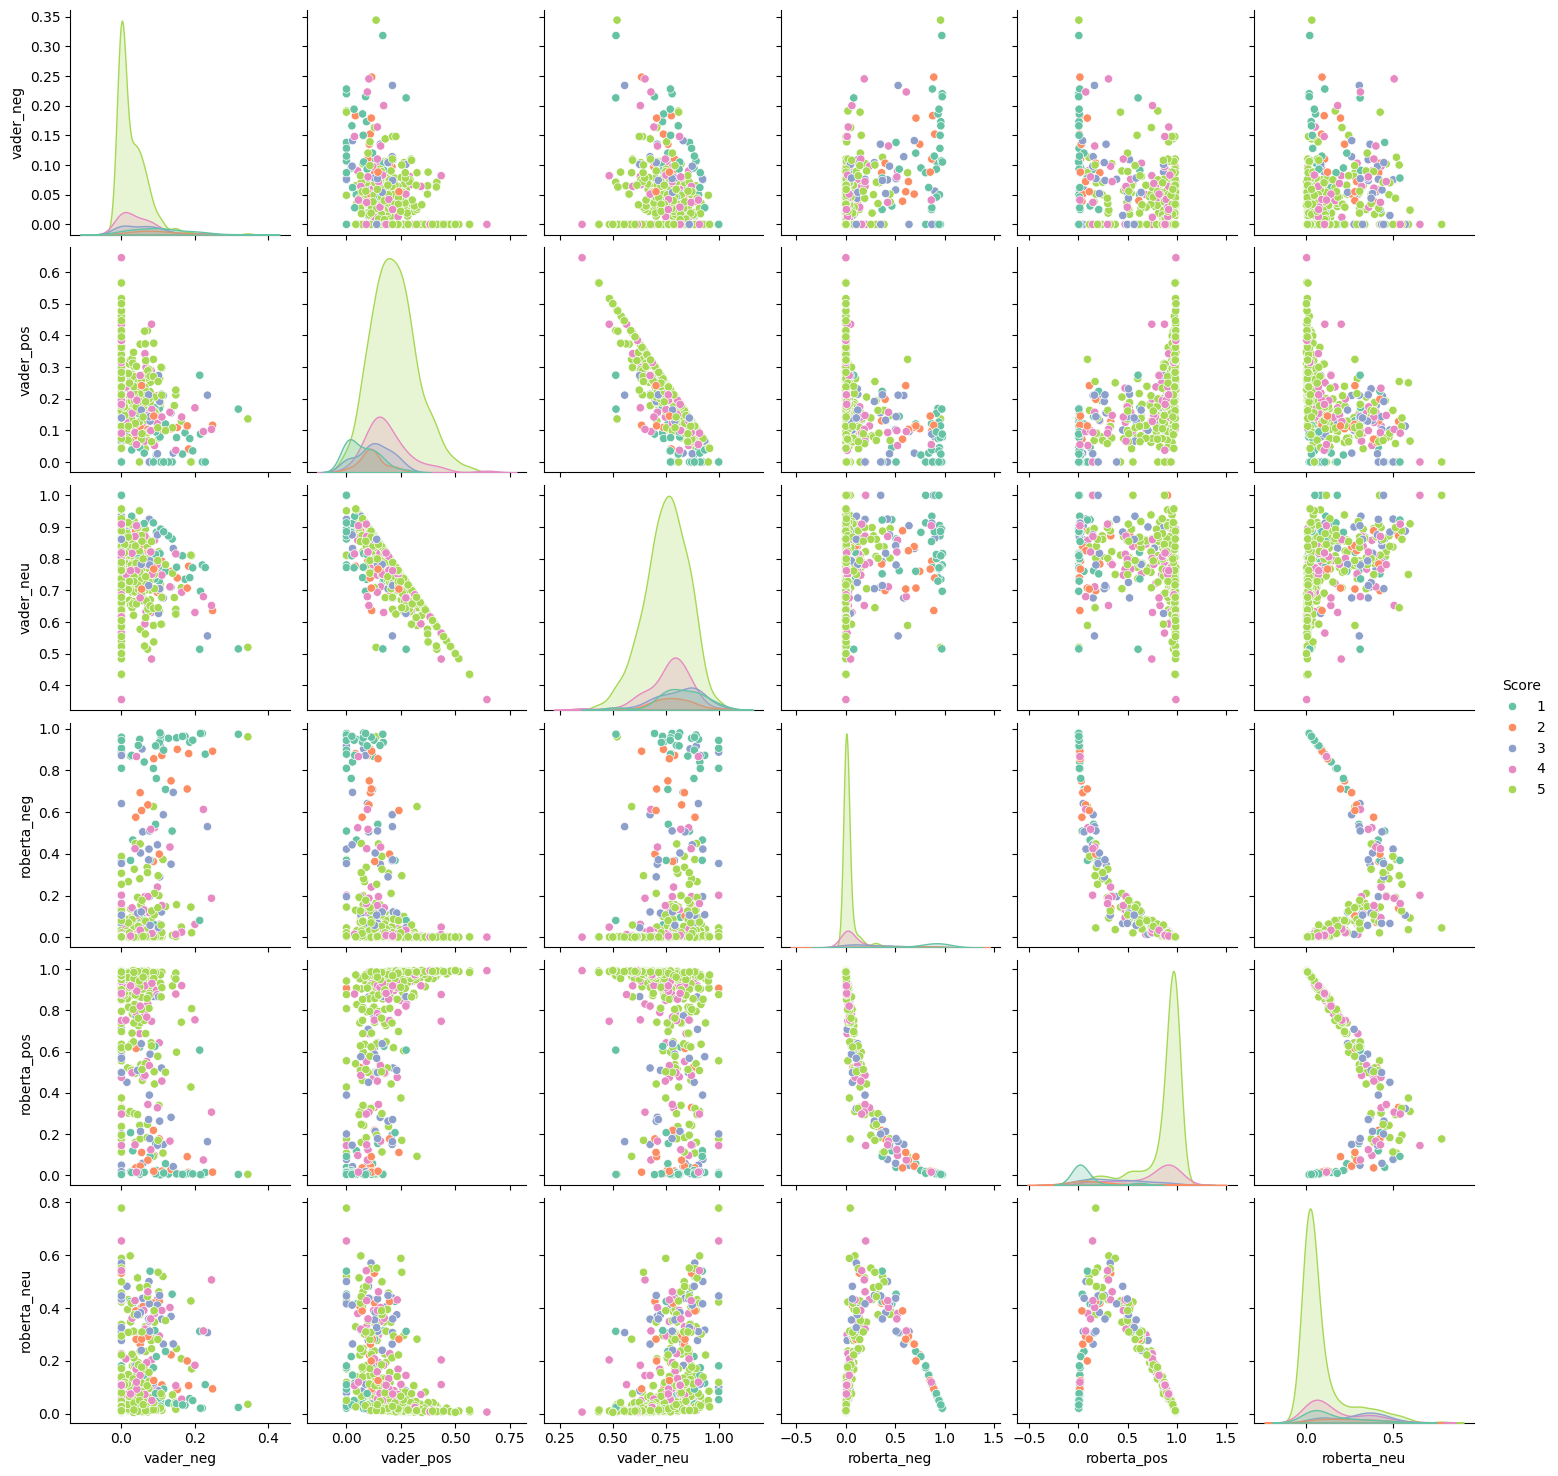

In [35]:
sns.pairplot(data = results_df,
            vars = ['vader_neg' , 'vader_pos' , 'vader_neu' , 
                   'roberta_neg' , 'roberta_pos' , 'roberta_neu']
            ,
            hue='Score',
            palette = 'Set2')
plt.show()

In [36]:
from transformers import pipeline
pipe = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [37]:
pipe('dad! , i got my first job')

[{'label': 'POSITIVE', 'score': 0.9984059929847717}]

In [38]:
pipe('life sucks ')

[{'label': 'NEGATIVE', 'score': 0.9996532201766968}]

In [39]:
pipe('I reached a point where there is no point in trying to compete with them')

[{'label': 'NEGATIVE', 'score': 0.9996206760406494}]

In [40]:
pipe('we are working hard, lessgo we will crack good placement for us ')

[{'label': 'POSITIVE', 'score': 0.9877397418022156}]

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
analyzer = SentimentIntensityAnalyzer()

In [42]:

def vader_to_label(score):
  # Positive sentiment: compound score >= 0.05
  if score >= 0.05:
    return 'positive'
  # Negative sentiment: compound score <= -0.05
  elif score <= -0.05:
    return 'negative'
  # Neutral sentiment: compound score between -0.05 and 0.05
  else:
    return 'neutral'
df = pd.DataFrame ({'text': ['I love this product', 'This is a terrible movie', 'It was okay', 'I hate this book'], 'label': ['positive', 'negative', 'neutral', 'negative']})
df = df.rename(columns={'vader_score': 'old_vader_score'})
df.insert (1, 'vader_score', df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound']))

df['vader_label'] = df['vader_score'].apply(vader_to_label)


vader_accuracy = accuracy_score(df['label'], df['vader_label'])
confusion_matrix_report = confusion_matrix(df['label'] , df['vader_label'])
report = classification_report(df['label'] , df['vader_label'])
print(f'The accuracy of VADER on the data is ', vader_accuracy*100)
print('confusion matrix is ' , confusion_matrix_report)
print('classification report of vader model is ' , report)

The accuracy of VADER on the data is  75.0
confusion matrix is  [[2 0 0]
 [0 0 1]
 [0 0 1]]
classification report of vader model is                precision    recall  f1-score   support

    negative       1.00      1.00      1.00         2
     neutral       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4

